<a href="https://colab.research.google.com/github/waelrash1/forecastingmodelsPY/blob/main/CH03/CHAP03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Random Walk Process
This chapter covers
* Identifying a random walk process
* Understanding the ACF function
* Classifying differencing, stationarity, and white noise
* Using the ACF plot and differencing to identify a random walk
* Forecasting a random walk

In [39]:
!pip install statsmodels

In [40]:
from statsmodels.tsa.seasonal import seasonal_decompose, STL
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

## GOOGL - April 28, 2020 to April 27, 2021

In [88]:
df = pd.read_csv('https://raw.githubusercontent.com/waelrash1/timeSeriesPy/master/data/GOOGL.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-04-27,1292.000000,1294.099976,1265.060059,1270.859985,1270.859985,2209300
1,2020-04-28,1283.199951,1284.760010,1230.380005,1232.589966,1232.589966,4035000
2,2020-04-29,1345.000000,1360.150024,1326.729980,1342.180054,1342.180054,5417900
3,2020-04-30,1331.359985,1350.000000,1321.500000,1346.699951,1346.699951,2792100
4,2020-05-01,1324.089966,1351.430054,1309.660034,1317.319946,1317.319946,2443600


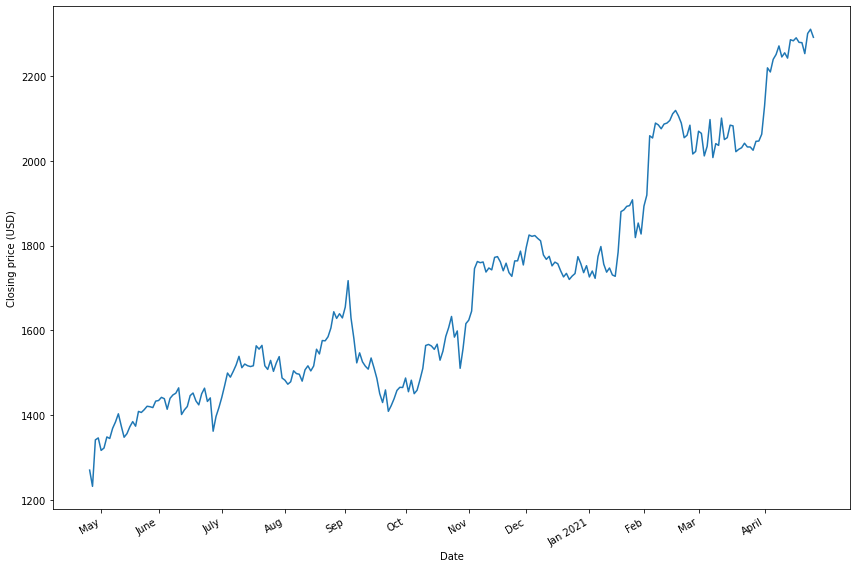

In [89]:
fig, ax = plt.subplots(figsize=(12, 8))

ax.plot(df['Date'], df['Close'])
ax.set_xlabel('Date')
ax.set_ylabel('Closing price (USD)')

plt.xticks(
    [4, 24, 46, 68, 89, 110, 132, 152, 174, 193, 212, 235], 
    ['May', 'June', 'July', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Jan 2021', 'Feb', 'Mar', 'April'])

fig.autofmt_xdate()
plt.tight_layout()

plt.savefig('figures/CH03_F01_peixeiro.png', dpi=300)

You can clearly see a long-term trend, since the closing price increased between April 27, 2020, and April 27, 2021. However, there are also abrupt changes in the trend, with periods where it sharply decreases before suddenly increasing again.

## 3.1 The random walk process 

> A random walk is a process in which there is an equal chance of going up or down by a random number. This is usually observed in financial and economic data, like the previous Figure. Daily closing price of GOOGL from April 27, 2020, to April 27, 2021 daily closing price of GOOGL. Random walks often expose long periods where a positive or negative trend can be observed. They are also often accompanied by sudden changes in direction.

In a random walk process, the present value $y_t$ is a function of the value at the previous timestep $y_{t –1}$, 
* a constant C, and a random number $\epsilon_t$, also termed white noise. 
*  $\epsilon_t$ is the realization of the standard normal distribution, which has a variance of 1 and a mean of 0.

> we can mathematically express a random walk with the following equation,

 $$
 \Large y_t= C+ y_{t-1}+\epsilon_t
 $$

where $y_t$ is the value at the present time $t, C$ is a constant, $y_{t –1}$ is the value at the previous timestep $t–1$, and ϵt is a random number.


## 3.2 Simulation random walk process 

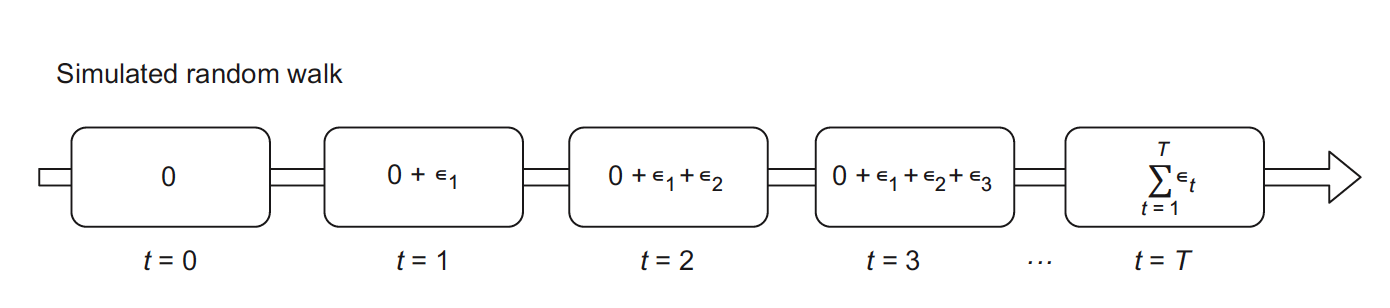

In [43]:
np.random.seed(42)

steps = np.random.standard_normal(1000)
steps[0]=0

random_walk = np.cumsum(steps)

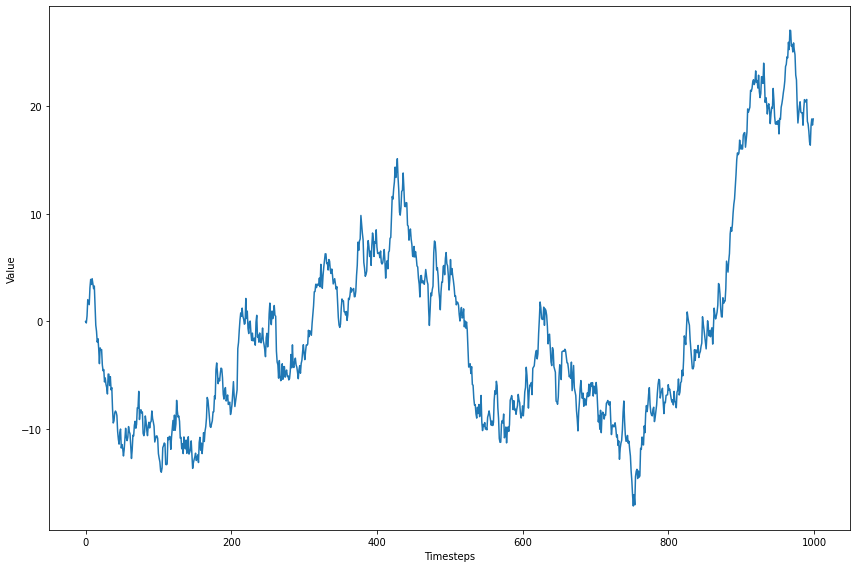

In [44]:
fig, ax = plt.subplots(figsize=(12,8))

ax.plot(random_walk)
ax.set_xlabel('Timesteps')
ax.set_ylabel('Value')

plt.tight_layout()
plt.savefig('figures/CH03_F03_peixeiro.png', dpi=300)

## Random walk
> A random walk is a series whose first difference is stationary and uncorrelated. This means that the process moves completely at random.

## Stationarity
> A stationary process is one whose statistical properties do not change over time. A times series is said to be stationary if its mean, variance, and autocorrelation do
not change over time.

## Transformation in time series forecasting
* A transformation is a mathematical operation applied to a time series in order to make it stationary.
* Differencing is a transformation that calculates the change from one timestep to another. This transformation is useful for stabilizing the mean.
* Applying a log function to the series can stabilize its variance.

## Differnce Transformation
> The simplest transformation one can apply is differencing. This transformation helps stabilize the mean, which in turn removes or reduces the trend and seasonality effects.

> Differencing involves calculating the series of changes from one timestep to another. To accomplish that, we simply subtract the value of the previous timestep $y_{t–1}$ from the value in the present $y_t$ to obtain the differenced value $y'_t$.


$$
\Large y'_t= y_t-y_{t-1}
$$

## 3.2.2 Testing for stationarity 

## Augmented Dickey-Fuller (ADF) test
> The augmented Dickey-Fuller (ADF) test helps us determine if a time series is stationary by testing for the presence of a unit root. If a unit root is present, the time series is not stationary. The null hypothesis states that a unit root is present, meaning that our time series is not stationary

> Let’s consider a very simple time series where the present value $y_t$ only depends on its past value $y_{t –1}$ subject to a coefficient $\alpha_1$, a constant $C$, and white noise $\epsilon_t$. We can write the following general expression:
$$
\Large y_t = C + \alpha_1 y_{t –1} + \epsilon_t
$$

* $\epsilon_t$ represents some error that we cannot predict, and $C$ is a constant.
* $\alpha_1$ is the root of the time series. This time series will be stationary only if the root lies within the unit circle. 
* Therefore, its value must be between –1 and 1. Otherwise the series is non-stationary.



## Autocorrelation function
> The autocorrelation function (ACF) measures the linear relationship between lagged values of a time series. In other words, it measures the correlation of the time series with itself.

* correlation measures the extent of a linear relationship between two variables. 
* Autocorrelation therefore measures the linear relationship between laggedvalues of a time series. 
* Thus, the ACF reveals how the correlation between any two values changes as the lag increases. Here, the lag is simply the number of timesteps separating two values.

For example, we can calculate the autocorrelation coefficient between yt and yt–1. In
this case, the lag is equal to 1, and the coefficient would be denoted as r1. Similarly, we
can calculate the autocorrelation between yt and yt–2. Then the lag would be 2, and
the coefficient would be denoted as r2. When we plot the ACF function, the coefficient
is the dependent variable, while the lag is the independent variable. Note that
the autocorrelation coefficient at lag 0 will always be equal to 1. This makes sense intuitively,
because the linear relationship between a variable and itself at the same timestep
should be perfect, and therefore equal to 1.
In the presence of a trend, a plot of the ACF will show that the coefficients are
high for short lags, and they will decrease linearly as the lag increases. If the data is
seasonal, the ACF plot will also display cyclical patterns. Therefore, plotting the ACF
function of a non-stationary process will not give us more information than is available
by looking at the evolution of our process through time. However, plotting the ACF
for a stationary process can help us identify the presence of a random walk.

>Let’s verify this by simulating two different series. One will be stationary and the other will have a unit root, meaning that it will not be stationary.


$$
\Large y_t = 0.5y_{t –1} + \epsilon_t 
$$

$$
\Large y_t = y_{t –1} + \epsilon_t 
$$

In [45]:
def simulate_process(seed:int, is_stationary: bool) -> np.array:
    np.random.seed(seed)
    process = np.empty(400)

    if is_stationary:
        alpha = 0.5
        process[0] = 0
    else:
        alpha = 1
        process[0] = 10

    for i, _ in enumerate(process[:-1], start=1):
        process[i] = alpha * process[i-1] + np.random.standard_normal()
        
    return process

The for loop iterates over the elements in the process array up to the second-to-last element, and uses enumerate to get the index of each element and the value at that index, which we don't actually need. The start parameter for enumerate is set to 1 so that the index starts from 1 instead of 0. The break statement has been removed since it is not necessary, since the for loop only runs for 399 iterations, which is the length of process minus 1.

In [46]:
stationary = simulate_process(42,True)
non_stationary = simulate_process(42,False)

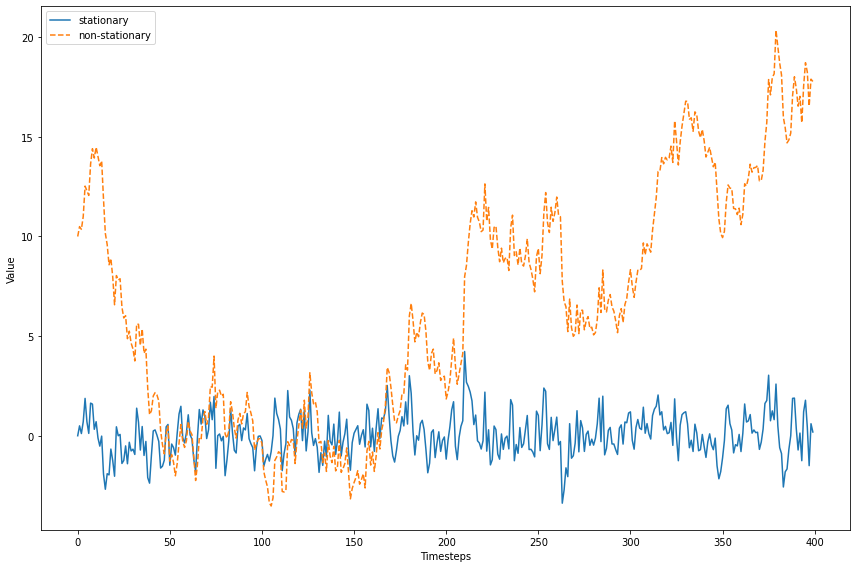

In [47]:
fig, ax = plt.subplots(figsize=(12,8))

ax.plot(stationary, linestyle='-', label='stationary')
ax.plot(non_stationary, linestyle='--', label='non-stationary')
ax.set_xlabel('Timesteps')
ax.set_ylabel('Value')
ax.legend(loc=2)

plt.tight_layout()
plt.savefig('figures/CH03_F06_peixeiro.png', dpi=300)

In [48]:
def mean_over_time(process: np.array) -> np.array:
    mean_func = []
    
    for i in range(len(process)):
        mean_func.append(np.mean(process[:i]))
    
    return mean_func

In [49]:
stationary_mean = mean_over_time(stationary)
non_stationary_mean = mean_over_time(non_stationary)

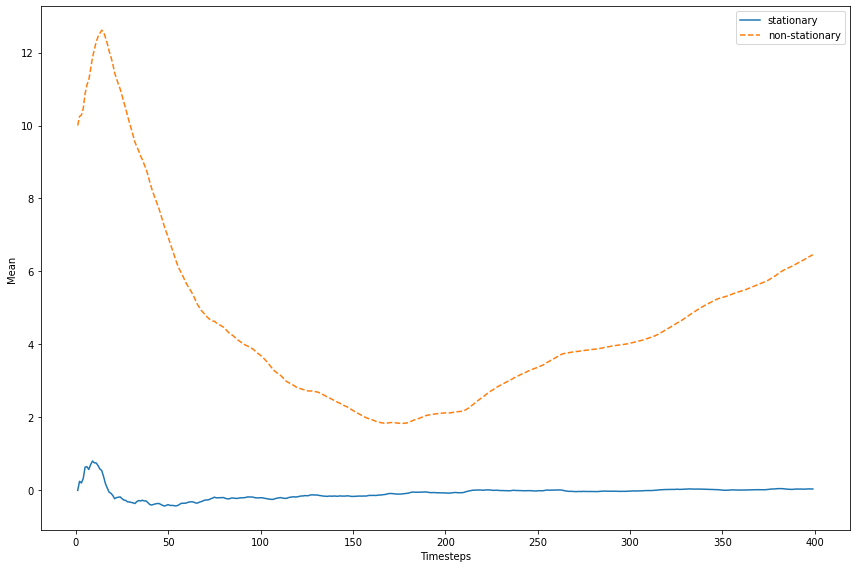

In [50]:
fig, ax = plt.subplots(figsize=(12,8))

ax.plot(stationary_mean, label='stationary')
ax.plot(non_stationary_mean, linestyle='--', label='non-stationary')
ax.set_xlabel('Timesteps')
ax.set_ylabel('Mean')
ax.legend(loc=1)

plt.tight_layout()
plt.savefig('figures/CH03_F07_peixeiro.png', dpi=300)

In [51]:
def var_over_time(process: np.array) -> np.array:
    var_func = []
    
    for i in range(len(process)):
        var_func.append(np.var(process[:i]))
    
    return var_func

In [52]:
stationary_var = var_over_time(stationary)
non_stationary_var = var_over_time(non_stationary)

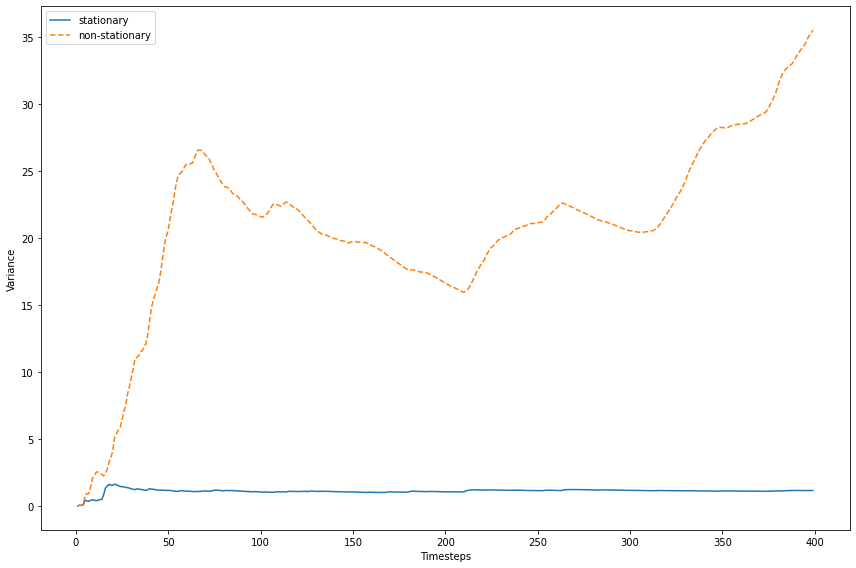

In [53]:
fig, ax = plt.subplots(figsize=(12,8))

ax.plot(stationary_var, label='stationary')
ax.plot(non_stationary_var, linestyle='--', label='non-stationary')
ax.set_xlabel('Timesteps')
ax.set_ylabel('Variance')
ax.legend(loc=2)

plt.tight_layout()
plt.savefig('figures/CH03_F08_peixeiro.png', dpi=300)

### 3.2.4 Putting it all together 

In [54]:
ADF_result = adfuller(random_walk)

print(f'ADF Statistic: {ADF_result[0]}')
print(f'p-value: {ADF_result[1]}')

ADF Statistic: -0.965952487691875
p-value: 0.7654789696692581


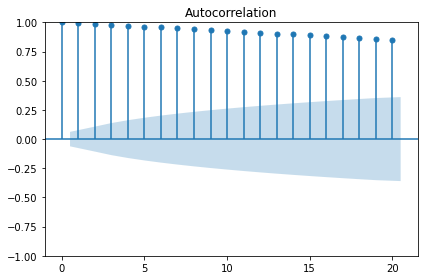

In [55]:
plot_acf(random_walk, lags=20);

plt.tight_layout()
plt.savefig('figures/CH03_F09_peixeiro.png', dpi=300)

In [56]:
diff_random_walk = np.diff(random_walk, n=1)

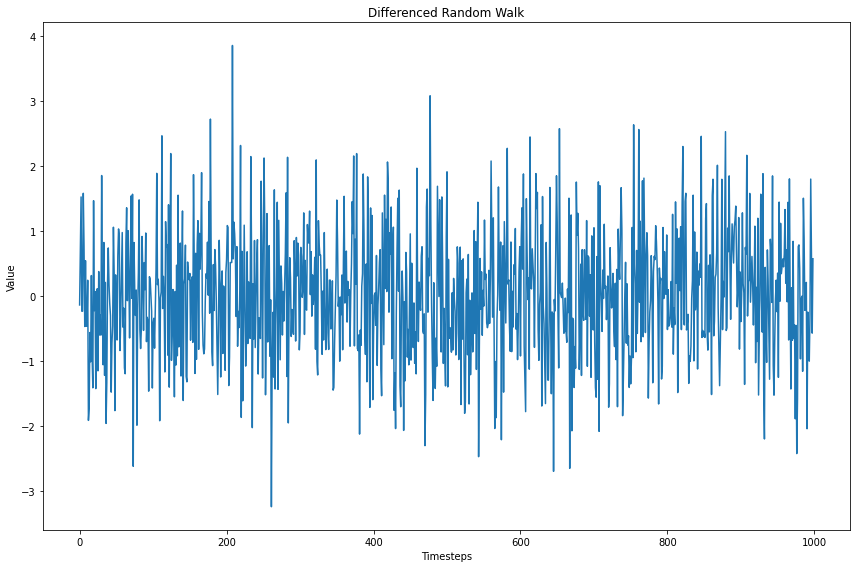

In [85]:
fig, ax = plt.subplots(figsize=(12,8))

ax.plot(diff_random_walk)
ax.set_xlabel('Timesteps')
ax.set_title('Differenced Random Walk')
ax.set_ylabel('Value')

plt.tight_layout()
plt.savefig('figures/CH03_F10_peixeiro.png', dpi=300)


In [58]:
ADF_result = adfuller(diff_random_walk)

print(f'ADF Statistic: {ADF_result[0]}')
print(f'p-value: {ADF_result[1]}')

ADF Statistic: -31.789310857560594
p-value: 0.0


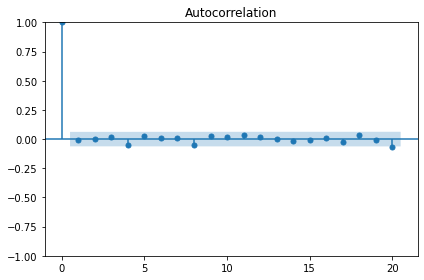

In [59]:
plot_acf(diff_random_walk, lags=20);

plt.tight_layout()

plt.savefig('figures/CH03_F11_peixeiro.png', dpi=300)

### 3.2.5 Is GOOGL a random walk? 

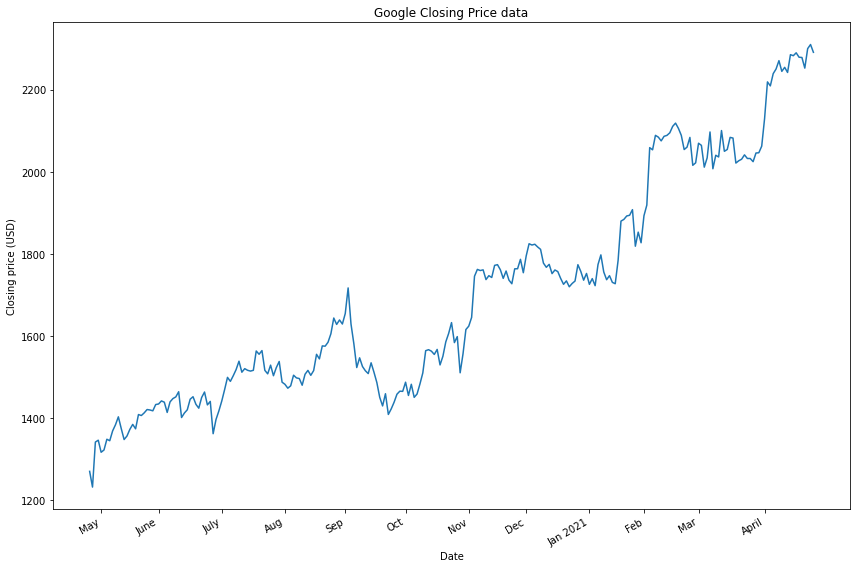

In [103]:
df = pd.read_csv('https://raw.githubusercontent.com/waelrash1/timeSeriesPy/master/data/GOOGL.csv')

fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(df['Date'], df['Close'])
ax.set_xlabel('Date')
ax.set_ylabel('Closing price (USD)')
ax.set_title('Google Closing Price data')
plt.xticks(
    [4, 24, 46, 68, 89, 110, 132, 152, 174, 193, 212, 235], 
    ['May', 'June', 'July', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Jan 2021', 'Feb', 'Mar', 'April'])

fig.autofmt_xdate()
plt.tight_layout()

plt.savefig('figures/CH03_F01_peixeiro.png', dpi=300)

In [96]:
GOOGL_ADF_result = adfuller(df['Close'])

print(f'ADF Statistic: {GOOGL_ADF_result[0]}')
print(f'p-value: {GOOGL_ADF_result[1]}')

ADF Statistic: 0.16025048664771302
p-value: 0.9699419435913057


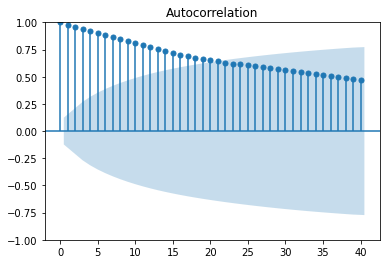

In [105]:
plot_acf(df['Close'], lags=40);

plt.savefig('figures/CH03_F13_Google_ACF.png', dpi=300)

In [100]:
diff_close = np.diff(df['Close'], n=1)

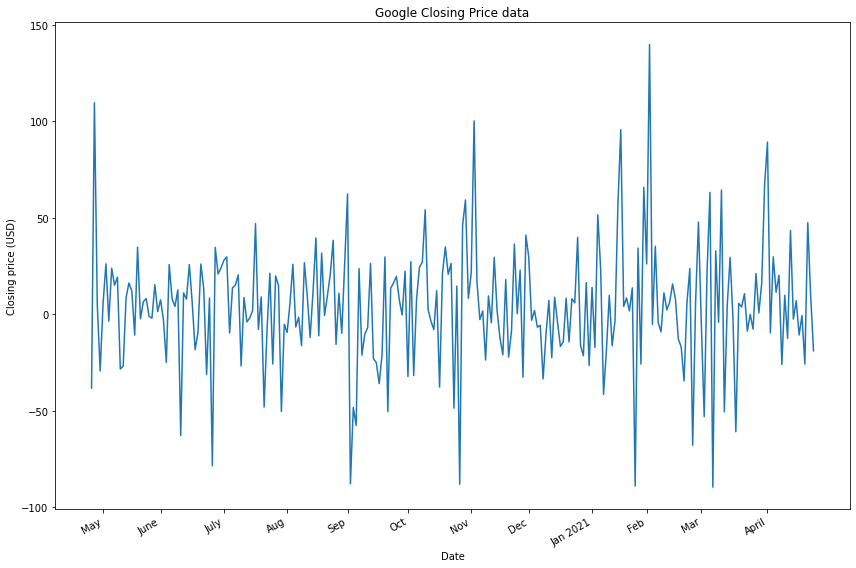

In [102]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot( diff_close)
ax.set_xlabel('Date')
ax.set_ylabel('Closing price (USD)')
ax.set_title('Google Closing Price data')
plt.xticks(
    [4, 24, 46, 68, 89, 110, 132, 152, 174, 193, 212, 235], 
    ['May', 'June', 'July', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Jan 2021', 'Feb', 'Mar', 'April'])

fig.autofmt_xdate()
plt.tight_layout()

plt.savefig('figures/CH03_F01_Google_Diff.png', dpi=300)

In [62]:
GOOGL_diff_ADF_result = adfuller(diff_close)

print(f'ADF Statistic: {GOOGL_diff_ADF_result[0]}')
print(f'p-value: {GOOGL_diff_ADF_result[1]}')

ADF Statistic: -5.303439704295234
p-value: 5.3865309614545585e-06


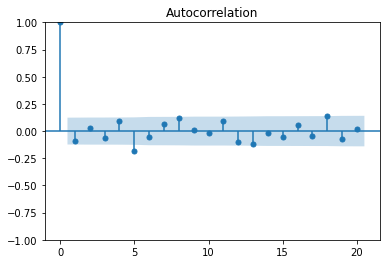

In [107]:
plot_acf(diff_close, lags=20);

plt.savefig('figures/CH03_F13_peixeiro.png', dpi=300)

## 3.3 Forecasting a random walk
### 3.3.1 Forecasting on a long horizon

In [64]:
df = pd.DataFrame({'value': random_walk})

train = df[:800]
test = df[800:]

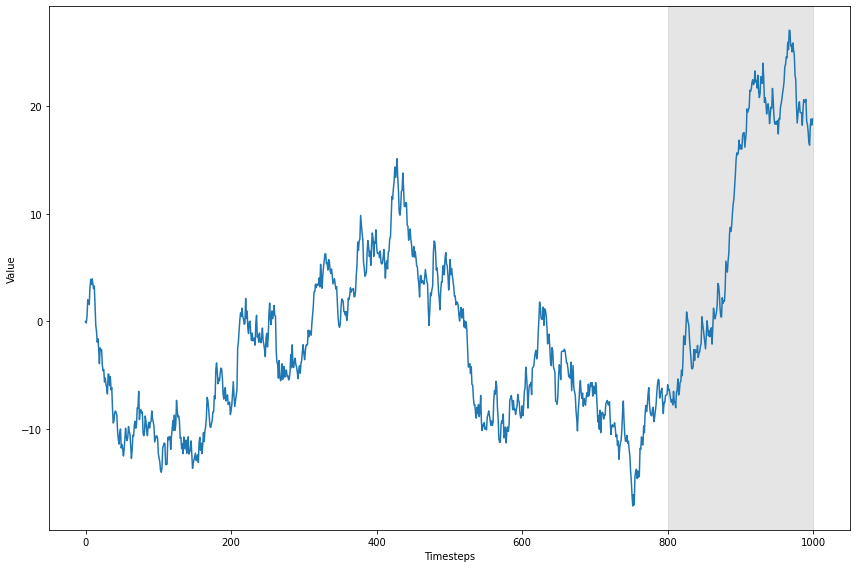

In [65]:
fig, ax = plt.subplots(figsize=(12,8))

ax.plot(random_walk)
ax.set_xlabel('Timesteps')
ax.set_ylabel('Value')
ax.axvspan(800, 1000, color='#808080', alpha=0.2)

plt.tight_layout()
plt.savefig('figures/CH03_F14_peixeiro.png', dpi=300)

In [66]:
mean = np.mean(train.value)

test.loc[:, 'pred_mean'] = mean

test.head()

,value,pred_mean
800,-5.876664,-3.677206
801,-6.392708,-3.677206
802,-6.296588,-3.677206
803,-6.758863,-3.677206
804,-7.193359,-3.677206


In [67]:
last_value = train.iloc[-1].value

test.loc[:, 'pred_last'] = last_value

test.head()

,value,pred_mean,pred_last
800,-5.876664,-3.677206,-6.814947
801,-6.392708,-3.677206,-6.814947
802,-6.296588,-3.677206,-6.814947
803,-6.758863,-3.677206,-6.814947
804,-7.193359,-3.677206,-6.814947


In [68]:
deltaX = 800 - 1
deltaY = last_value - 0

drift = deltaY / deltaX

x_vals = np.arange(801, 1001, 1)

pred_drift = drift * x_vals

test.loc[:, 'pred_drift'] = pred_drift

test.head()

,value,pred_mean,pred_last,pred_drift
800,-5.876664,-3.677206,-6.814947,-6.832006
801,-6.392708,-3.677206,-6.814947,-6.840536
802,-6.296588,-3.677206,-6.814947,-6.849065
803,-6.758863,-3.677206,-6.814947,-6.857594
804,-7.193359,-3.677206,-6.814947,-6.866124


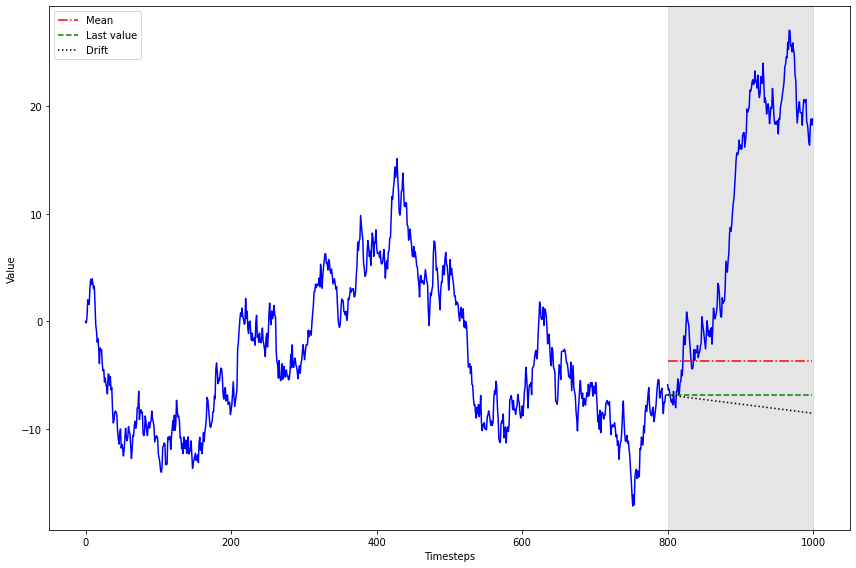

In [69]:
fig, ax = plt.subplots(figsize=(12,8))

ax.plot(train.value, 'b-')
ax.plot(test['value'], 'b-')
ax.plot(test['pred_mean'], 'r-.', label='Mean')
ax.plot(test['pred_last'], 'g--', label='Last value')
ax.plot(test['pred_drift'], 'k:', label='Drift')

ax.axvspan(800, 1000, color='#808080', alpha=0.2)
ax.legend(loc=2)

ax.set_xlabel('Timesteps')
ax.set_ylabel('Value')

plt.tight_layout()
plt.savefig('figures/CH03_F15_peixeiro.png', dpi=300)

In [70]:
from sklearn.metrics import mean_squared_error

mse_mean = mean_squared_error(test['value'], test['pred_mean'])
mse_last = mean_squared_error(test['value'], test['pred_last'])
mse_drift = mean_squared_error(test['value'], test['pred_drift'])

print(mse_mean, mse_last, mse_drift)

326.50277395297474 425.1726033055617 466.2172769077409


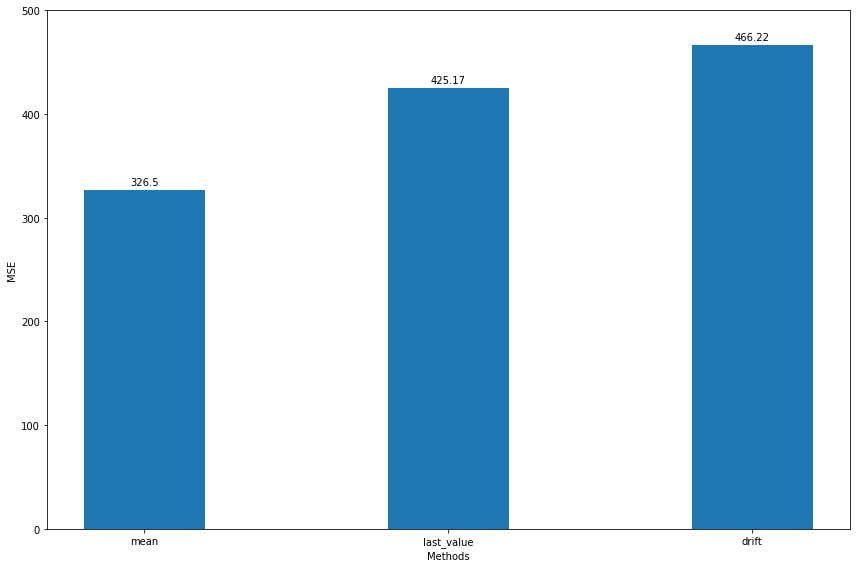

In [71]:
fig, ax = plt.subplots(figsize=(12,8))

x = ['mean', 'last_value', 'drift']
y = [mse_mean, mse_last, mse_drift]

ax.bar(x, y, width=0.4)
ax.set_xlabel('Methods')
ax.set_ylabel('MSE')
ax.set_ylim(0, 500)

for index, value in enumerate(y):
    plt.text(x=index, y=value+5, s=str(round(value, 2)), ha='center')

plt.tight_layout()

plt.savefig('figures/CH03_F16_peixeiro.png', dpi=300)

### 3.3.2 Forecasting the next timestep 

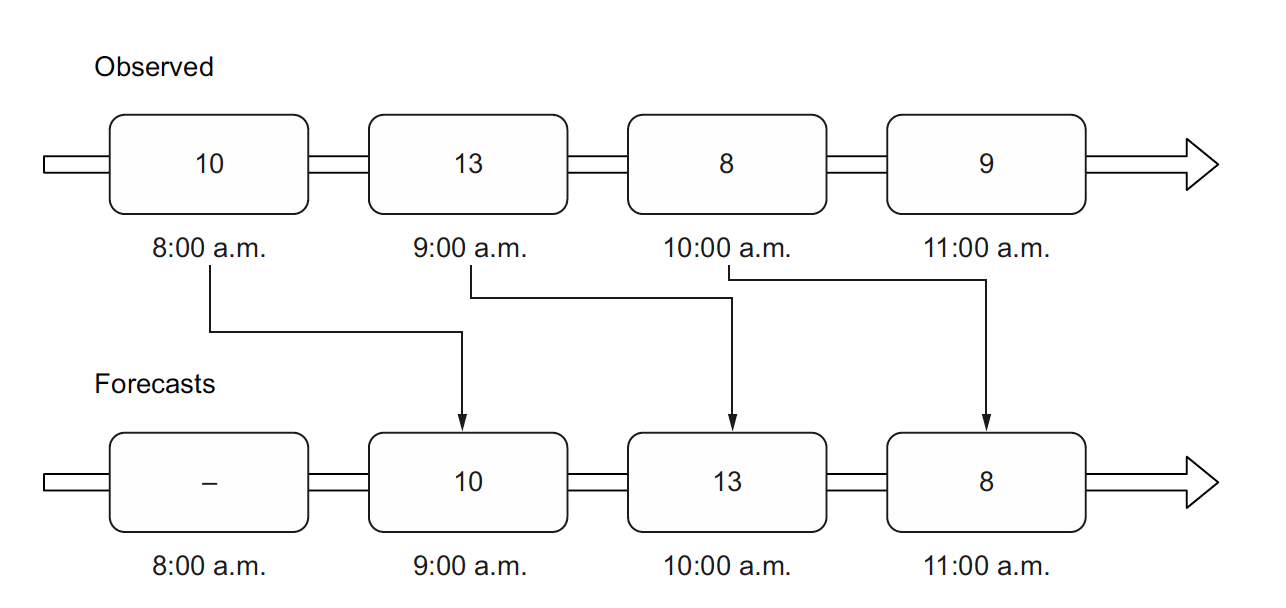

In [72]:
df_shift = df.shift(periods=1)

df_shift.head()

,value
0,NaN
1,0.000000
2,-0.138264
3,0.509424
4,2.032454


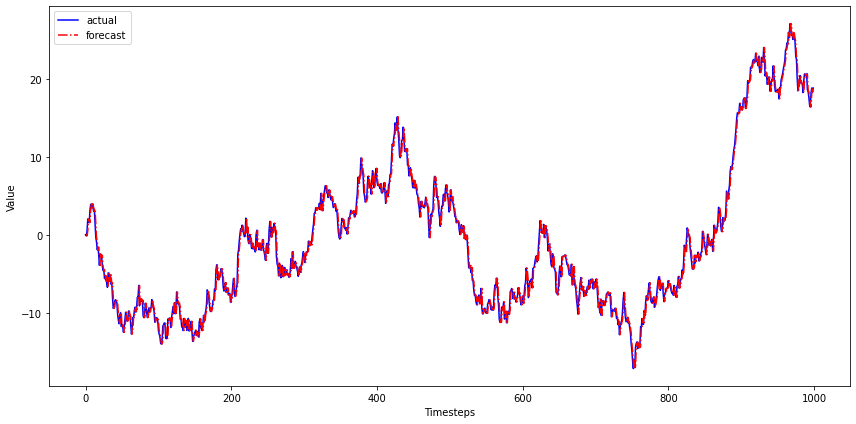

In [80]:
fig, ax = plt.subplots(figsize=(12,6))

ax.plot(df, 'b-', label='actual')
ax.plot(df_shift, 'r-.', label='forecast')

ax.legend(loc=2)

ax.set_xlabel('Timesteps')
ax.set_ylabel('Value')

plt.tight_layout()

plt.savefig('figures/CH03_F18_peixeiro.png', dpi=300)

In [74]:
mse_one_step = mean_squared_error(test['value'], df_shift[800:])

mse_one_step

0.9256876651440581

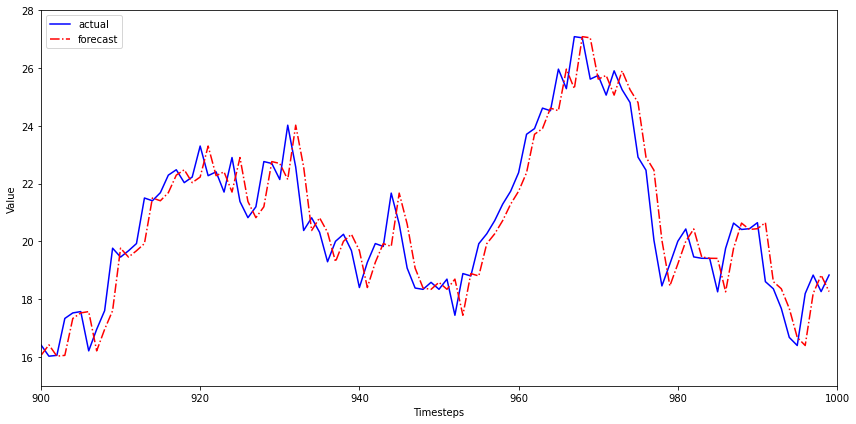

In [79]:
fig, ax = plt.subplots(figsize=(12,6))

ax.plot(df, 'b-', label='actual')
ax.plot(df_shift, 'r-.', label='forecast')

ax.legend(loc=2)

ax.set_xlim(900, 1000)
ax.set_ylim(15, 28)

ax.set_xlabel('Timesteps')
ax.set_ylabel('Value')

plt.tight_layout()

plt.savefig('figures/CH03_F19_peixeiro.png', dpi=300)

Therefore, if a random walk process must be forecast, it is better to make many
short-term forecasts. That way, we do not allow for many random numbers to accumulate
over time, which will degrade the quality of our forecasts in the long term.
Because a random process takes random steps into the future, we cannot use statistical
or deep learning techniques to fit such a process: there is nothing to learn from
randomness and it cannot be predicted. Instead, we must rely on naive forecasting
methods

## Identifying random walk process

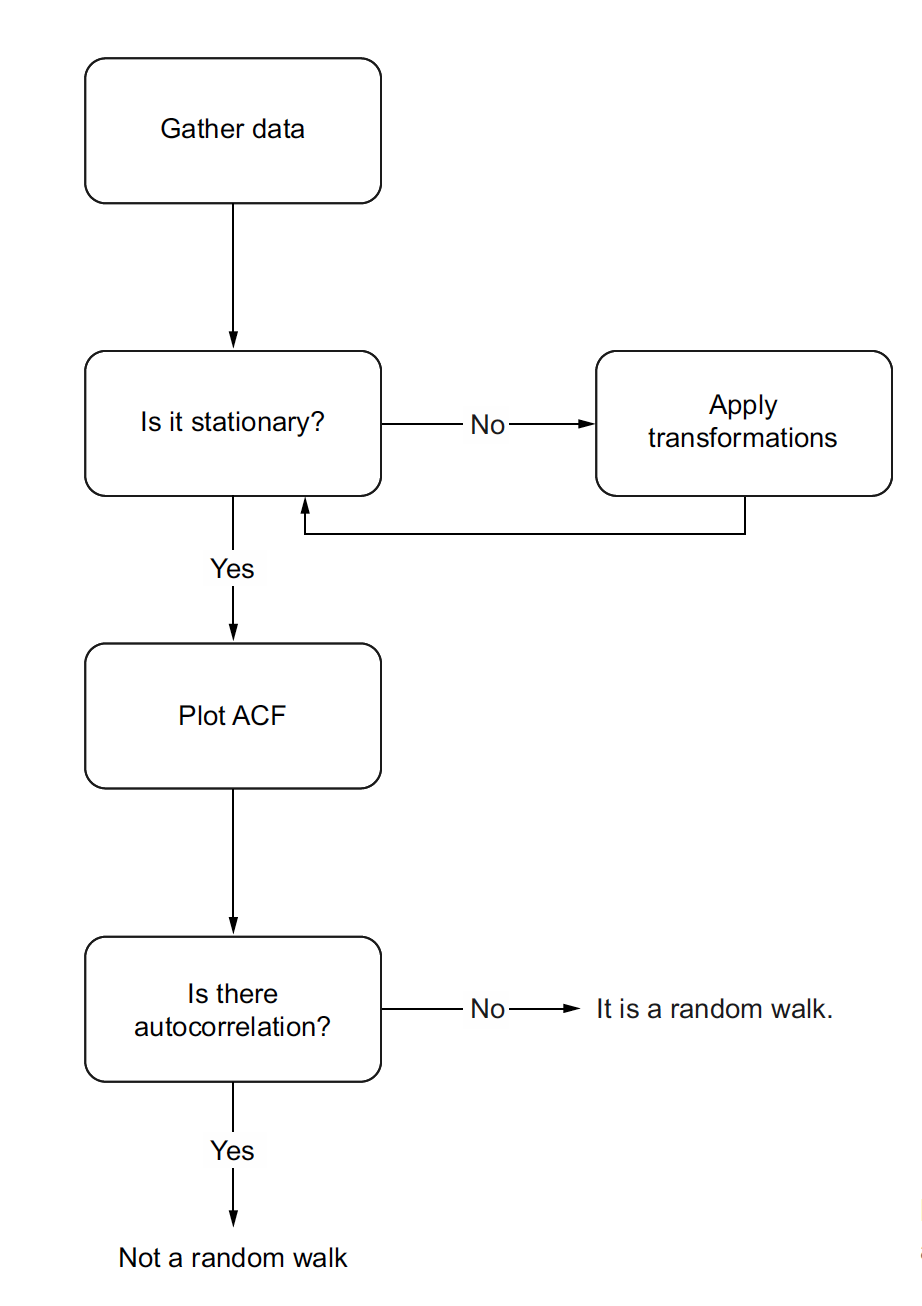

# Summary
* A random walk is a process where the first difference is stationary and not autocorrelated.
* We cannot use statistical or deep learning techniques on a random walk, since it moves at random in the future. Therefore, we must use naive forecasts.

* A stationary time series is one whose statistical properties (mean, variance, autocorrelation) do not change over time.
* The augmented Dickey-Fuller (ADF) test is used to assess stationarity by testing for unit roots.
* The null hypothesis of the ADF test is that there is a unit root in the series. If the ADF statistic is a large negative value and the p-value is less than 0.05, the null hypothesis is rejected, and the series is stationary.
*  Transformations are used to make a series stationary. Differencing can stabilize the trend and seasonality, while logarithms stabilize the variance.
* Autocorrelation measures the correlation between a variable and itself at a previous timestep (lag). The autocorrelation function (ACF) shows how the autocorrelation changes as a function of the lag.
*  Ideally, we will forecast a random walk in the short term or the next timestep. That way, we do not allow for random numbers to accumulate, which will degrade the quality of our forecasts in the long term.